# Linear Regression


In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display

display.set_matplotlib_formats('svg')

/tmp/ipykernel_18456/2400937917.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


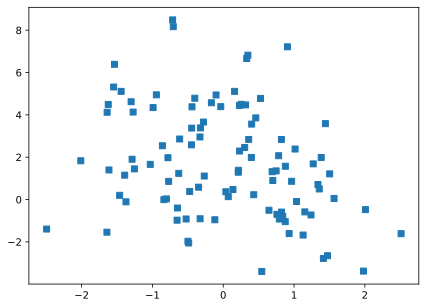

In [2]:
# Generate some fake data for demonstration
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

n = 100
p = 5

X = np.random.randn(n, p)
e = np.random.randn(n, 1)
beta = np.random.randn(p, 1)
y = 2 + X @ beta + e

plt.plot(X[:, 1], y, "s")

The linear regression model relates the response (target) variable to a set of inputs (predictors) by assuming a linear relationship between the response and the predictors. For the $i-th$ observation (sample) and $p$ predictors, the linear regression model can be written as:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} + \epsilon_i
$$

or in matrix form for all $n$ observations:

$$
y_{n \times p} = X_{n \times p} \beta_{p \times 1} + \epsilon_{n \times 1}
$$

The least squares method provides a solution for the $\beta$ coefficients that minimizes the sum of the squared residuals:

$$
\hat{\beta} = \arg \min_{\beta} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_{i1} - \ldots - \beta_p x_{ip})^2
$$

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

This solution coincides with the maximum likelihood estimate of the coefficients under the assumption of normally distributed errors.

In [3]:
linreg = LinearRegression()
linreg.fit(X, y)
print(linreg.coef_)

[[-1.96774758 -0.62491479  0.88067964 -0.89748234  1.01172735]]


In [4]:
linreg.intercept_

array([2.06095552])

In [5]:
beta.T

array([[-1.7548764 , -0.69164384,  0.98232789, -0.90056737,  0.94286909]])

## Linear Regression as a ANN

A linear regression model is a special case of a neural network with no hidden layers, a linear activation function, and a mean squared error loss function. The usual neural network notation uses $w$ for the weights and $b$ for the biases instead of $\beta$ for the coefficients. The equation for the ANN model is:

$$
\hat{y}_i = b + w_1 x_{i1} + \ldots + w_p x_{ip} = b + w^T x_i
$$

which is simply the dot product of the weights and the inputs plus the bias term.
The usual visualization of this model is a single neuron with $p$ inputs and a single output. The neuron computes the weighted sum of the inputs plus a bias term. The output of the neuron passes through the identity activation function and produces the predicted value $\hat{y}$.


```{mermaid}
%%| label: fig-single-neuron
%%| fig-width: 6
%%| fig-cap: "ANN model for linear regression for a single observation"

graph LR
    x1["$$x_{i1}$$"] -->|$$w_1$$| B(($$w^T x_i + b$$))
    x2["$$x_{i2}$$"] -->|$$w_2$$| B
    xp["$$x_{ip}$$"] -->|$$w_p$$| B
    B --> |"$$\mathbb{I}$$"|C["$$\hat{y}$$"]
```

The loss function is the mean squared error (MSE) between the predicted values and the true values:

For a single observation $i$:

$$
L_i = (y_i - \hat{y}_i)^2
$$

For gradient descent, we need the derivative of the loss function with respect to the weights and the bias:

$$
\frac{\partial L_i}{\partial w_j} = -2 x_{ij} (y_i - \hat{y}_i)
$$

For the bias (for which $x_{i0} = 1$):

$$
\frac{\partial L_i}{\partial b} = -2 (y_i - \hat{y}_i)
$$


For a given learning rate $\eta$, the update rule for the weights and the bias is:

$$
w^{t + 1}_j = w^{t}_j - \eta \frac{\partial L_i}{\partial w_j}
$$


In [6]:
X[0, :]

array([-0.46774891, -0.32686775, -0.79895431,  1.546446  , -0.89993239])

In [7]:
X[0].shape

(5,)

In [8]:
epochsn = 400
lr = 0.01

w = np.random.randn(p)
b = np.random.randn(1)

losses = np.zeros(epochsn * n)

for epoch in range(epochsn):
    epoch_loss = 0
    for i in range(n):
        y_pred = w.dot(X[i]) + b
        
        loss = (y[i] - y_pred) ** 2
        gradient = -2 * X[i].T * (y[i] - y_pred)
        w = w - lr * gradient
        b = b - lr * (-2 * (y[i] - y_pred))
        epoch_loss += loss

    losses[epoch] = epoch_loss / n


/tmp/ipykernel_18456/3636673814.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  losses[epoch] = epoch_loss / n


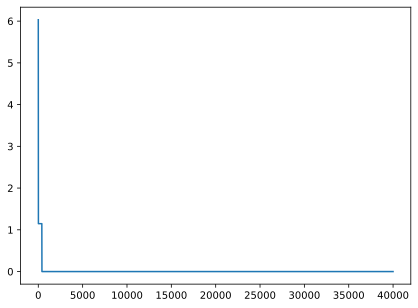

In [9]:
plt.plot(losses)

In [10]:
#%%
linreg.coef_

array([[-1.96774758, -0.62491479,  0.88067964, -0.89748234,  1.01172735]])

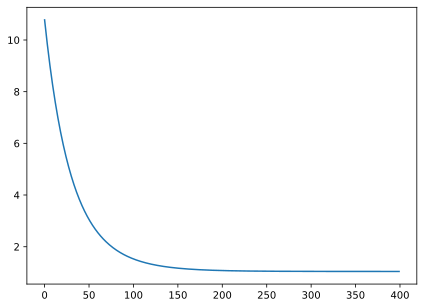

In [11]:
# The same with PyTorch

Xtens = torch.tensor(X, dtype=torch.float32)
ytens = torch.tensor(y, dtype=torch.float32)

ANNreg = nn.Sequential(
    nn.Linear(p, 1)
)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=lr)

losses = np.zeros(epochsn)

for epoch in range(epochsn):
    y_pred = ANNreg(Xtens)
    loss = loss_fn(y_pred, ytens)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses[epoch] = loss.item()


plt.plot(losses)


In [12]:
#%%
ANNreg[0].weight.detach().numpy()

array([[-1.9603072 , -0.6234079 ,  0.87007725, -0.893707  ,  0.9990559 ]],
      dtype=float32)

In [13]:
#%%
linreg.coef_

array([[-1.96774758, -0.62491479,  0.88067964, -0.89748234,  1.01172735]])